In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

In [2]:
(X_train,y_train),(X_test,y_test)= tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
y_train_oh = tf.one_hot(y_train, depth=10)
y_test_oh = tf.one_hot(y_test, depth=10)

In [8]:
y_train_oh.shape

TensorShape([60000, 10])

In [9]:
y_test_oh.shape

TensorShape([10000, 10])

In [10]:
X_train=X_train[:10000]
y_train = y_train[:10000]

In [11]:
X_train.shape

(10000, 28, 28)

In [12]:
X_train = X_train.reshape(10000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [13]:
X_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_train))
X_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(X_test))

In [14]:
X_train.shape

TensorShape([10000, 28, 28, 3])

In [15]:
X_test.shape

TensorShape([10000, 28, 28, 3])

In [16]:
def visualize_number(data_point_index):
    plt.imshow(X_train[data_point_index])
    plt.show()

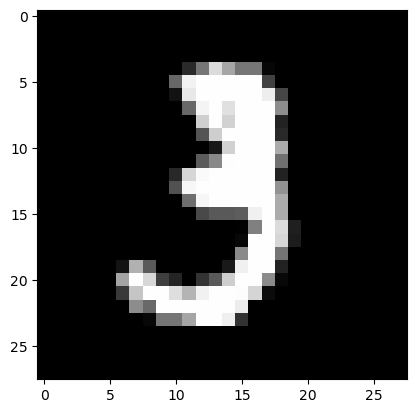

In [17]:
visualize_number(10)

### Convolutional Neural network setup

In [19]:
X_train = tf.cast(X_train,tf.float32)
X_test = tf.cast(X_test,tf.float32)

In [20]:
input_layer = layers.Input(shape=(28,28,3))

In [21]:
input_layer.shape

(None, 28, 28, 3)

In [22]:
dummy_train_tensor=X_train[:4]

In [23]:
dummy_train_tensor.shape

TensorShape([4, 28, 28, 3])

### CNN output dimensions

$
\frac{W-F+2S}{S}+1
$

output_dim = (28-5)+1=24 \
output_dim = (24-6)+1=19


In [25]:
x = layers.Conv2D(64,5, activation="relu")(dummy_train_tensor)

In [26]:
 x.shape

TensorShape([4, 24, 24, 64])

In [27]:
x = layers.Conv2D(32,6, activation="relu")(x)

In [28]:
x.shape

TensorShape([4, 19, 19, 32])

In [29]:
x = layers.Conv2D(16,7, activation="relu")(x)

In [30]:
x.shape

TensorShape([4, 13, 13, 16])

In [31]:
x = layers.Flatten()(x)

#### Note :
$ H*W*channel$ \
$13*13*16 $= 2704


In [33]:
x.shape

TensorShape([4, 2704])

In [34]:
x = Dense(10, activation = 'sigmoid')(x)

In [35]:
x.shape

TensorShape([4, 10])

### CNN architecture

In [37]:
tf.random.set_seed(0)
input_layer = layers.Input(shape=(28,28,3))

x = layers.Conv2D(64,5, activation ="relu", name='conv_layer_1')(input_layer)
x = layers.Conv2D(32,6, activation="relu",name='conv_layer_2')(x)
x = layers.Conv2D(16,8, activation="relu",name='conv_layer_3')(x)

z =layers.Flatten()(x)

output_layer  = Dense(10, activation = 'sigmoid', name ='output_layer')(z)

In [38]:
cnn = Model(inputs = input_layer, outputs = output_layer)

In [39]:
cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 24, 24, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 19, 19, 32)     │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 12, 12, 16)     │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,458 (525.23 KB)

 Trainable params: 134,458 (525.23 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
def my_metric_fn(y_true, y_pred):
    cos = tf.keras.losses.CosineSimilarity()(y_true,y_pred)
    return tf.reduce_mean(cos)

In [41]:
cnn.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(), my_metric_fn])

In [42]:
y_train_oh.shape

TensorShape([60000, 10])

In [43]:
history_cnn = cnn.fit(X_train, y_train_oh, epochs=15, batch_size =20, validation_split=.2,shuffle=True)

Epoch 1/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.2862 - auc: 0.6729 - loss: 3.0319 - my_metric_fn: -0.3763 - val_accuracy: 0.8700 - val_auc: 0.9602 - val_loss: 0.4963 - val_my_metric_fn: -0.7569
Epoch 2/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8862 - auc: 0.9737 - loss: 0.3793 - my_metric_fn: -0.7940 - val_accuracy: 0.9290 - val_auc: 0.9867 - val_loss: 0.2617 - val_my_metric_fn: -0.8527
Epoch 3/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9303 - auc: 0.9874 - loss: 0.2328 - my_metric_fn: -0.8509 - val_accuracy: 0.9315 - val_auc: 0.9888 - val_loss: 0.2357 - val_my_metric_fn: -0.8527
Epoch 4/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9526 - auc: 0.9918 - loss: 0.1557 - my_metric_fn: -0.8577 - val_accuracy: 0.9425 - val_auc: 0.9874 - val_loss: 0.2596 - val_my_metric_fn: -0.8613
Epoch 5/15
400/400 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9584 - auc: 0.9922 - loss: 0.1478 - my_metric_fn: -0.8487 - val_accuracy: 0.9265 

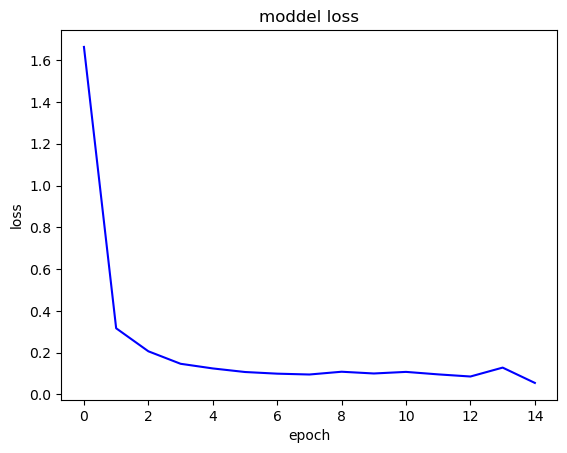

In [44]:
plt.plot(history_cnn.history['loss'],'b')
plt.title('moddel loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [45]:
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [46]:
y_pred_rounded = np.argmax(y_pred, axis=1)

In [47]:
y_test_rounded = np.argmax(y_test_oh, axis=1)

In [48]:
accuracy_score(y_test_rounded, y_pred_rounded)

0.9493

### Visualizing intermediate input using Balck Box

In [80]:
truncated_cnn = Model(inputs=input_layer, outputs=x)

In [82]:
intermediate_embedding = truncated_cnn.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [52]:
X_test.shape

TensorShape([10000, 28, 28, 3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


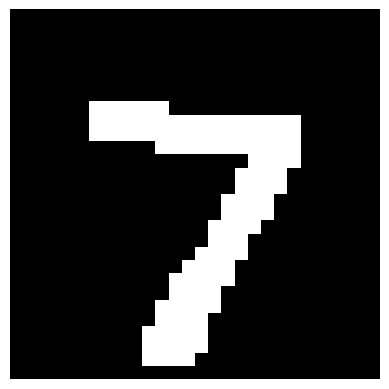

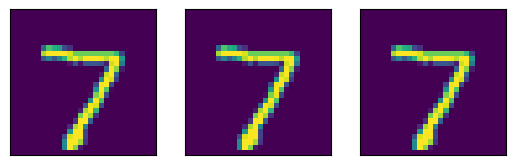

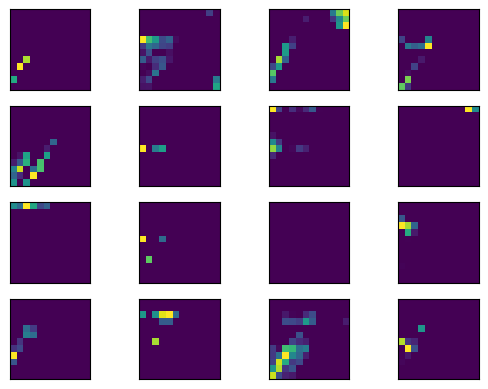

In [53]:
plt.imshow(X_test[0], interpolation = 'nearest')
plt.axis('off')

fig, axs = plt.subplots(1,3)
for j in range(3):
    axs[j].imshow(X_test[0][:,:,j], interpolation='nearest')
    axs[j].set_xticks([])
    axs[j].set_yticks([])
fig, axs = plt.subplots(4,4)
c=0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(intermediate_embedding[0][0:,0:,c], interpolation='nearest')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        c=c+1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


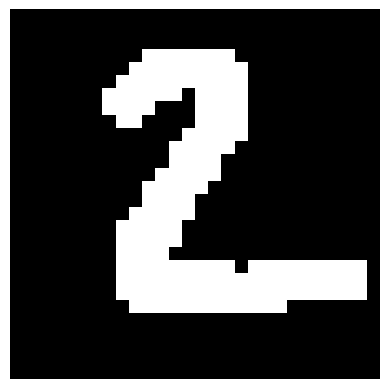

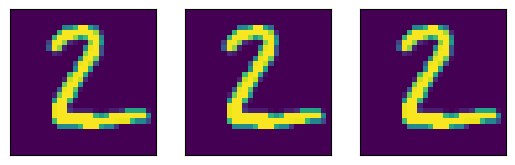

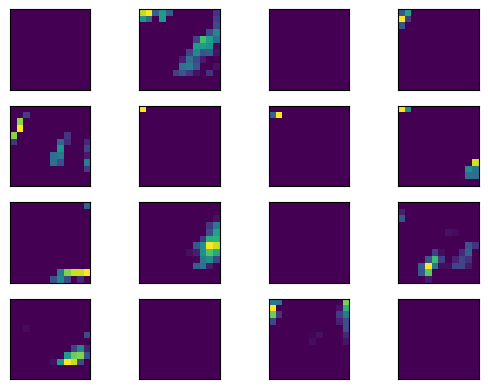

In [54]:
plt.imshow(X_test[1], interpolation = 'nearest')
plt.axis('off')

fig, axs = plt.subplots(1,3)
for j in range(3):
    axs[j].imshow(X_test[1][:,:,j], interpolation='nearest')
    axs[j].set_xticks([])
    axs[j].set_yticks([])
fig, axs = plt.subplots(4,4)
c=0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(intermediate_embedding[1][0:,0:,c], interpolation='nearest')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        c=c+1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


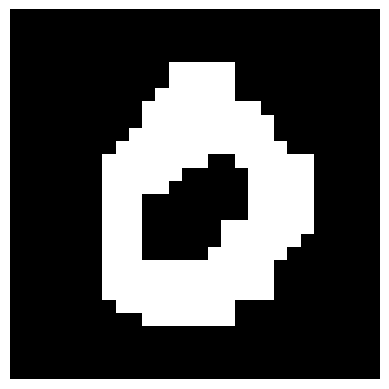

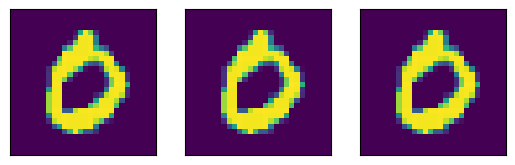

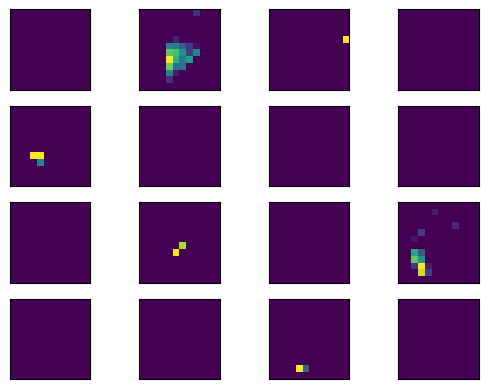

In [55]:
plt.imshow(X_test[3], interpolation = 'nearest')
plt.axis('off')

fig, axs = plt.subplots(1,3)
for j in range(3):
    axs[j].imshow(X_test[3][:,:,j], interpolation='nearest')
    axs[j].set_xticks([])
    axs[j].set_yticks([])
fig, axs = plt.subplots(4,4)
c=0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(intermediate_embedding[3][0:,0:,c], interpolation='nearest')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        c=c+1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


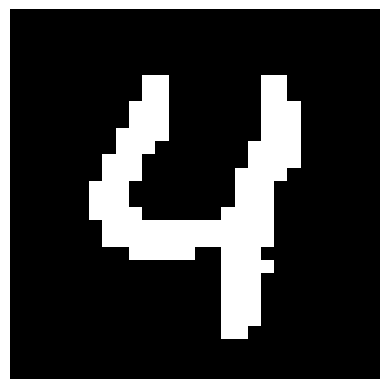

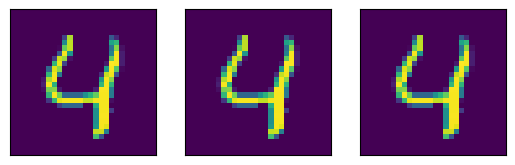

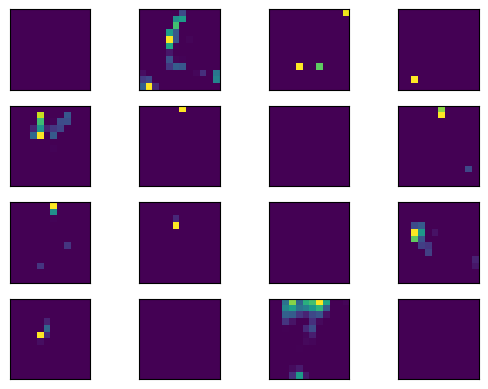

In [56]:
plt.imshow(X_test[4], interpolation = 'nearest')
plt.axis('off')

fig, axs = plt.subplots(1,3)
for j in range(3):
    axs[j].imshow(X_test[4][:,:,j], interpolation='nearest')
    axs[j].set_xticks([])
    axs[j].set_yticks([])
fig, axs = plt.subplots(4,4)
c=0
for i in range(4):
    for j in range(4):
        axs[i,j].imshow(intermediate_embedding[4][0:,0:,c], interpolation='nearest')
        axs[i,j].set_xticks([])
        axs[i,j].set_yticks([])
        c=c+1

In [57]:
print(tf.__version__)

2.17.0


### Saving CNN in Native Keras Format:

In [106]:
# Save model
cnn.save('./cnn_MNIST.keras')

In [108]:
cnn.save('./cnn_MNIST.h5')

### Load the Saved Model

In [111]:
model_h5 = load_model('./cnn_MNIST.h5', custom_objects={'my_metric_fn': my_metric_fn})

In [113]:
model = load_model('./cnn_MNIST.keras',compile=False)

In [115]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_1 (Conv2D)           │ (None, 24, 24, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_2 (Conv2D)           │ (None, 19, 19, 32)     │        73,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_layer_3 (Conv2D)           │ (None, 12, 12, 16)     │        32,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │        23,050 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,458 (525.23 KB)

 Trainable params: 134,458 (525.23 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
y_pred_L = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [118]:
y_pred_rounded_L = np.argmax(y_pred_L, axis=1)

In [119]:
y_test_rounded_L = np.argmax(y_test_oh, axis=1)

In [120]:
accuracy_score(y_test_rounded_L, y_pred_rounded_L)

0.9399